<a href="https://colab.research.google.com/github/pjdoucette/MAT422/blob/main/HW_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.2 Probability Distribution



---



Key Concepts:


*   Probability Axioms
*   Conditional Probability
*   Discrete Random Variables
*   Continues Random Variables




#### Set up

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from scipy.stats import bernoulli, poisson
from scipy.stats import norm, expon



---



###Probability Axioms

**Definition 2.2.1**
The sample space of an experiment, $S$, is the set of all possible outcomes. It is often more meaningful to study collection of outcomes.

**Definition 2.2.2**
An event is any collection or subset of outcomes contained in a sample space, $S$. A simple event has one outcome and a compount event has more than one outcome.

**Definition 2.2.3**
Given an experiment and a sample space $S$, the probability distribution is a function which assigns to each event $A$ a number $P(A)$, called the probability of the event $A$, which gives a precise measure of the chance that $A$ will occur. The probability assignments should satisfy the following axioms (basic properties) of probability.

- For any event $A$, $1 \geq P(A) \geq 0$
- $P(S) = 1$
- If $A_1, A_2, A_3, \dots$ is an infinite collection of disjoint events, then:
   $$
   P(A_1 \cup A_2 \cup A_3 \cup \cdots ) = \sum_{i=1}^{\infty} P(A_i)
   $$
- For any event $A$, $P(A) + P(A') = 1$, from which $P(A) = 1 - P(A')$
- When events $A$ and $B$ are mutually exclusive, $P(A \cup B) = P(A) + P(B)$
- For any two events $A$ and $B$:
$$
   P(A \cup B) = P(A) + P(B) - P(A \cap B)
$$

###Conditional Probability

Conditional probability is the likelihood of an event of an outcome occuring, based on the occurence of a previous event or outcome. The conditional probability is expressed as a ratio of unconditional probabilities. The numerator is the probability of the intersection of the two events, whereas the denominator is the probability of the conditioning event $B$.

Given that $B$ has occurred, the relevant sample space is no longer $S$, but consists of outcomes in $B$. Event $A$ has occurred if and only if one of the outcomes in the intersection $A \cap B$ occurred, so the conditional probability of $A$ given $B$ is proportional to $P(A \cap B)$.

<br><br>
**Definition 2.2.5**

For any two events $A$ and $B$ with $P(B) > 0$, the conditional probability of $A$ given that $B$ has occurred is defined by:
$$
P(A | B) = \frac{P(A \cap B)}{P(B)}
$$

<br><br>
**Multiplication Rule**
It is often the case that $P(A \cap B)$ is desired, whereas both $P(B)$ and $P(A | B)$ can be specified from the problem description.

$$
P(A \cap B) = P(A | B) \cdot P(B)
$$

<br><br>
**Definition 2.2.6**
Two events $A$ and $B$ are independent if:

$$
P(A | B) = P(A) \quad \text{or} \quad P(A \cap B) = P(A) \cdot P(B)
$$

Otherwise, the events are dependent.

**Definition 2.2.7**

The independence of two events can be extended to collections of more than two events.

Events $A_1, A_2, \dots, A_n$ are mutually independent if for every $k$ ($k = 2, 3, \dots, n$) and every subset of indices $i_1, i_2, \dots, i_k$:

$$
P(A_{i_1} \cap A_{i_2} \cap \dots \cap A_{i_k}) = P(A_{i_1}) \cdot P(A_{i_2}) \cdot \dots \cdot P(A_{i_k})
$$

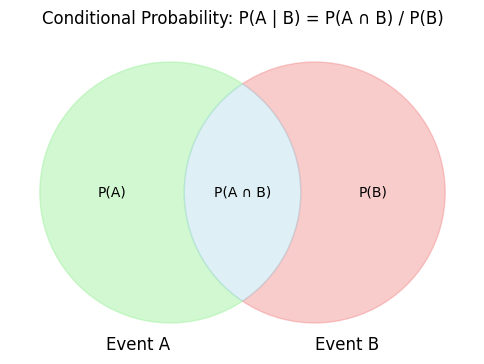

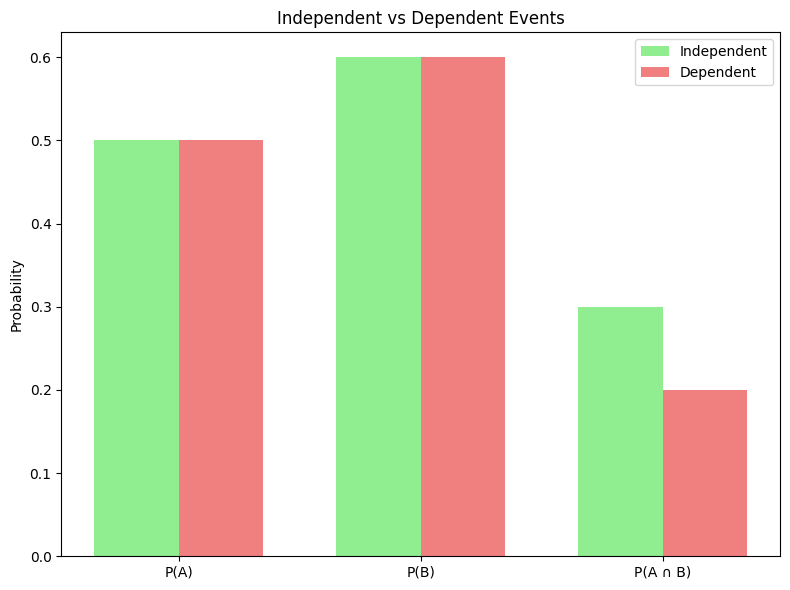

In [9]:
# Conditional probability
def conditional_probability():
    plt.figure(figsize=(6,6))

    # Create Venn diagram
    venn = venn2(subsets = (0.4, 0.4, 0.2), set_labels = ('Event A', 'Event B'))

    venn.get_patch_by_id('10').set_color('lightgreen')
    venn.get_patch_by_id('01').set_color('lightcoral')
    venn.get_patch_by_id('11').set_color('lightblue')
    venn.get_label_by_id('10').set_text('P(A)')
    venn.get_label_by_id('01').set_text('P(B)')
    venn.get_label_by_id('11').set_text('P(A ∩ B)')

    plt.title("Conditional Probability: P(A | B) = P(A ∩ B) / P(B)")
    plt.show()

# Independent and dependent events
def independence():
    events = ['P(A)', 'P(B)', 'P(A ∩ B)']

    independent_probabilities = [0.5, 0.6, 0.5 * 0.6]
    dependent_probabilities = [0.5, 0.6, 0.2]

    # Plot
    x = np.arange(len(events))
    width = 0.35
    plt.figure(figsize=(8,6))
    plt.bar(x - width/2, independent_probabilities, width, label='Independent', color='lightgreen')
    plt.bar(x + width/2, dependent_probabilities, width, label='Dependent', color='lightcoral')
    plt.ylabel('Probability')
    plt.title('Independent vs Dependent Events')
    plt.xticks(x, events)
    plt.legend()

    plt.tight_layout()
    plt.show()


conditional_probability()
independence()


###Discrete Random Variables

A **random variable** is a measurable function defined on a probability space, mapping outcome to real numbers. A random variable $X$ is a function from the sample space $S$ to the real numbers.

<br><br>
**Types of Random Variables**
1. **Discrete Random Variables**:
   - A discrete random variable takes on either a finite number of values or a countable infinite sequence of values.

2. **Continuous Random Variables**:
   - A continuous random variable has:
     1. A set of possible values in a continuous interval
     2. $P(X = c) = 0$ for any specific value $c$

<br><br>
**Probability Mass Function (PMF)**

The probability mass function of a discrete random variable $X$ provides the probability that $X$ equals a specific value $x$.

**Definition 2.2.10:** The pmf of $X$ is $p(x) = P(X = x)$, which is the probability that $X$ takes the value $x$.

<br><br>
**Cumulative Distribution Function (CDF)**
The cumulative distribution function $F(x)$ of $X$ gives the probability that $X$ is less than or equal to $x$.

**Definition 2.2.11:** The cdf $F(x)$ is defined as:
$$
F(x) = P(X \leq x) = \sum_{y \leq x} p(y)
$$

**Examples**

**Bernoulli** Random Variable: Outcome is 0 or 1

The pmf is:
$$
b(x; n, p) =
\begin{cases}
\binom{n}{x} p^x (1 - p)^{n - x} & x = 0,1,2,...,n \\
0 & \text{otherwise}
\end{cases}
$$

The cdf is:
$$
B(x; n, p) = P(X \leq x) = \sum_{y \leq x} b(y; n, p) = \sum_{y=0}^{x} \binom{n}{y} p^y (1 - p)^{n - y}
$$

<br><br>
**Mean and Variance:**
  $$
  E(X) = p
  V(X) = np(1-p)
  $$

<br><br>
**Poisson** Distributiuon: Models the number of events occurring in a fixed interval of time or space, given a constant mean rate $\mu$

The pmf is:
$$
p(x; \mu) = \frac{e^{-\mu} \mu^x}{x!}
$$
where:
- $x = 0, 1, 2, \ldots$ is the number of events,
- $\mu$ is the average rate of events

<br><br>
**Mean and Variance:**
$$
  E(X) = V(X) = \mu
$$


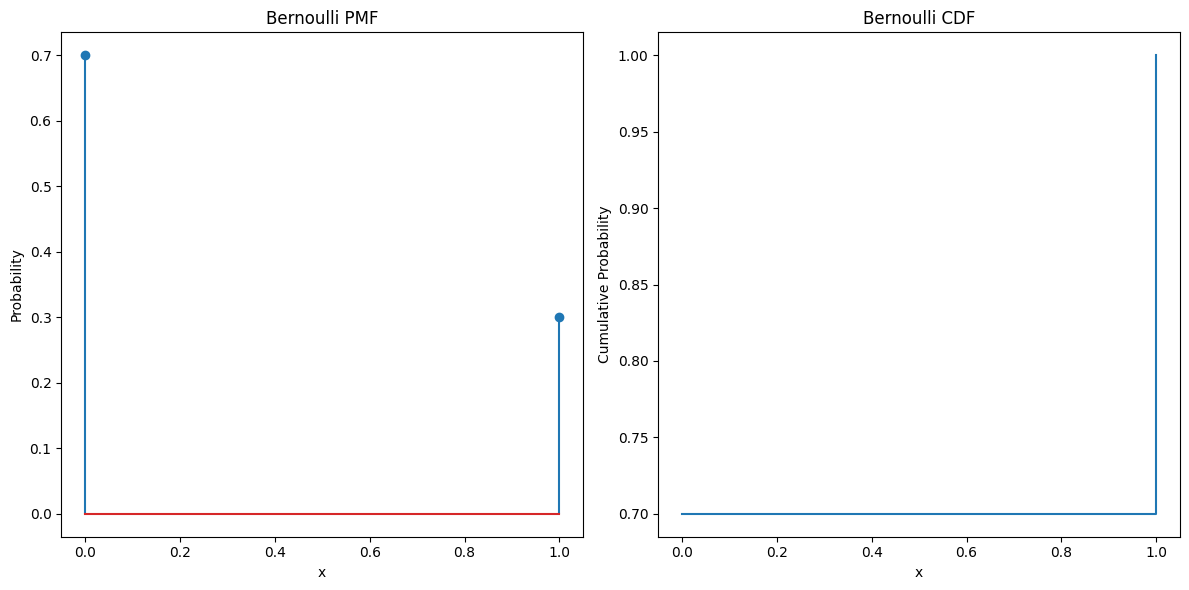

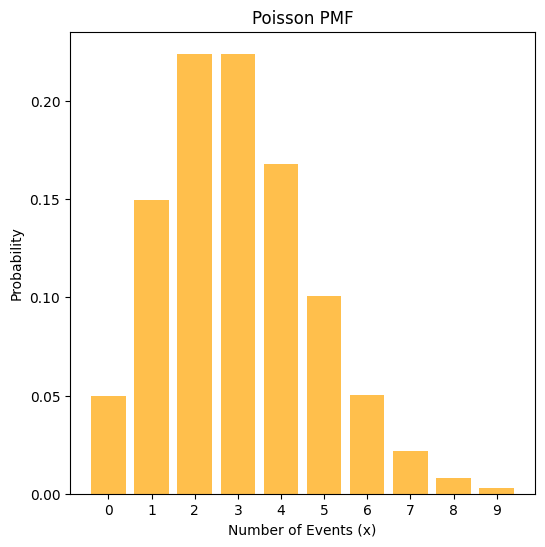

In [18]:
p = 0.3

# Bernoulli
x = np.arange(0, 2)
pmf = bernoulli.pmf(x, p)
cdf = bernoulli.cdf(x, p)

# Plot Bernoulli
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.stem(x, pmf, linefmt='-', markerfmt='o')
plt.title('Bernoulli PMF')
plt.xlabel('x')
plt.ylabel('Probability')

plt.subplot(1, 2, 2)
plt.step(x, cdf, where='post')
plt.title('Bernoulli CDF')
plt.xlabel('x')
plt.ylabel('Cumulative Probability')

plt.tight_layout()
plt.show()

# Poisson Random Variable
mu = 3
x_poisson = np.arange(0, 10)
pmf_poisson = poisson.pmf(x_poisson, mu)

# Plot Poisson
plt.figure(figsize=(6, 6))
plt.bar(x_poisson, pmf_poisson, alpha=0.7, color='orange')
plt.title('Poisson PMF')
plt.xlabel('Number of Events (x)')
plt.ylabel('Probability')
plt.xticks(x_poisson)

plt.show()


### Continues Random Variables

A random variable $X$ is continuous if its possible values form a single interval on the number line or a union of disjoint intervals.

**Definition 2.2.19:**  
A probability distribution or probability density function (PDF) \( f(x) \) of a continuous random variable \( X \) is a function such that for any two numbers \( a \) and \( b \) with \( a \leq b \):

$$
P(a \leq X \leq b) = \int_a^b f(x) \, dx
$$

**Properties of the PDF**
1. $ f(x) \geq 0 $ for all $x$
2.
$
\int_{-\infty}^\infty f(x) \, dx = 1
$

**Definition 2.2.20:**  
The expected or mean value of a continuous random variable $X$ with PDF $f(x)$ is:
$$
\mu_X = E(X) = \int_{-\infty}^\infty x \cdot f(x) \, dx
$$

**Definition 2.2.21:**  
The variance of $X$ is:

$$
\sigma_X^2 = V(X) = \int_{-\infty}^\infty (x - \mu)^2 \cdot f(x) \, dx
$$

The standard deviation of $X$ is:

$$
\sigma_X = \sqrt{V(X)}
$$

<br><br>
If \( X \) is a continuous random variable with PDF \( f(x) \) and \( h(X) \) is any function of \( X \), then:

$$
E[h(X)] = \int_{-\infty}^\infty h(x) \cdot f(x) \, dx
$$

Variance can be computed as:

$$
V(X) = E(X^2) - [E(X)]^2
$$

**Definition 2.2.23:**  
A continuous random variable \( X \) has an exponential distribution with parameter \( \lambda \) (\( \lambda > 0 \)) if the PDF of \( X \) is:

$$
f(x; \lambda) =
\begin{cases}
\lambda e^{-\lambda x} & \text{for } x \geq 0 \\
0 & \text{otherwise}
\end{cases}
$$

- The expected value of an exponentially distributed random variable \( X \) is:
$
E(X) = \int_0^\infty x \cdot \lambda e^{-\lambda x} \, dx
$

Using integration by parts, we get:
$$
\mu = \frac{1}{\lambda} \text{, }
\sigma^2 = \frac{1}{\lambda^2}
$$

**Normal Distribution**
A continuous random variable $X$ is said to have a normal distribution with parameters $\mu$ and $\sigma^2$, where $ -\infty < \mu < \infty$ and $\sigma > 0$, if the PDF of $X$ is:

$$
f(x; \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}}
$$

<br><br>
**Standard Normal Distribution**
The normal distribution with parameters $\mu = 0$ and $\sigma = 1$ is called the standard normal distribution. A random variable with a standard normal distribution is denoted by $Z$ and has the PDF:

$$
f(z; 0, 1) = \frac{1}{\sqrt{2 \pi}} e^{-\frac{z^2}{2}}
$$
<br><br>
If $X$ has a normal distribution with mean $\mu$ and standard deviation $\sigma$, then:

$$
Z = \frac{X - \mu}{\sigma}
$$

has a standard normal distribution. Thus:

$$
P(a \leq X \leq b) = P\left(\frac{a - \mu}{\sigma} \leq Z \leq \frac{b - \mu}{\sigma}\right) = \Phi\left(\frac{b - \mu}{\sigma}\right) - \Phi\left(\frac{a - \mu}{\sigma}\right)
$$

- The probability $P(X \leq a)$ is:

$$
\Phi\left(\frac{a - \mu}{\sigma}\right)
$$

- The probability $P(X \geq b)$ is:

$$
1 - \Phi\left(\frac{b - \mu}{\sigma}\right)
$$

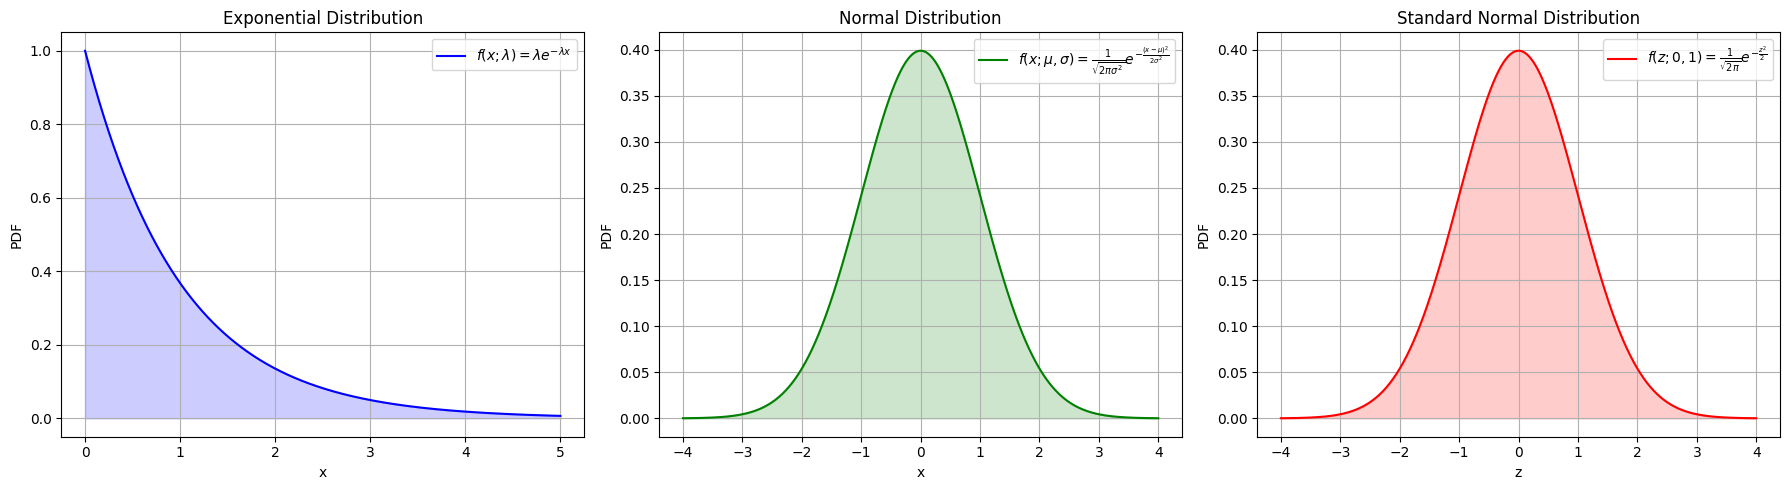

In [21]:
# Set up the figure and axes
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Exponential Distribution
lam = 1
x_exp = np.linspace(0, 5, 1000)
pdf_exp = expon.pdf(x_exp, scale=1/lam)

axs[0].plot(x_exp, pdf_exp, label=r'$f(x; \lambda) = \lambda e^{-\lambda x}$', color='blue')
axs[0].fill_between(x_exp, pdf_exp, alpha=0.2, color='blue')
axs[0].set_title('Exponential Distribution')
axs[0].set_xlabel('x')
axs[0].set_ylabel('PDF')
axs[0].grid(True)
axs[0].legend()

# Normal Distribution
mu = 0
sigma = 1
x_norm = np.linspace(-4, 4, 1000)
pdf_norm = norm.pdf(x_norm, loc=mu, scale=sigma)

axs[1].plot(x_norm, pdf_norm, label=r'$f(x; \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}}$', color='green')
axs[1].fill_between(x_norm, pdf_norm, alpha=0.2, color='green')
axs[1].set_title('Normal Distribution')
axs[1].set_xlabel('x')
axs[1].set_ylabel('PDF')
axs[1].grid(True)
axs[1].legend()

# Standard Normal Distribution
x_std_norm = np.linspace(-4, 4, 1000)
pdf_std_norm = norm.pdf(x_std_norm, loc=0, scale=1)

axs[2].plot(x_std_norm, pdf_std_norm, label=r'$f(z; 0, 1) = \frac{1}{\sqrt{2 \pi}} e^{-\frac{z^2}{2}}$', color='red')
axs[2].fill_between(x_std_norm, pdf_std_norm, alpha=0.2, color='red')
axs[2].set_title('Standard Normal Distribution')
axs[2].set_xlabel('z')
axs[2].set_ylabel('PDF')
axs[2].grid(True)
axs[2].legend()

plt.tight_layout()
plt.show()
